In [107]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# normal distribution
from scipy.stats import norm

# optimization and regression imports
from scipy.optimize import minimize
from scipy import stats

# data imports
import pandas_datareader as web
# IEX data import
import os
os.environ["IEX_API_KEY"] = ""
# Quandl data import
import quandl
quandl.ApiConfig.api_key = ""


In [108]:
# yahoo data is only up to 5 years old rolling (in 2020 it goes to 2015), google does not work, quandl might be ok
# quandl data is good from 2008 to 2018 March 27

# quandl data 2008 to 2018-03-27
"""
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)
"""

# iex data
"""
# each row counts as one data call, so below 1262x5 rows used up 26% of 50000 rows
df = web.DataReader(name='AMZN', data_source='iex', start=start, end=end)
df
"""

# yahoo data 5 years rolling if no start/end
# spy_etf = web.DataReader('SPY','yahoo')
start = datetime.date(2019,1,1)
end = datetime.date.today()

# list of stocks in portfolio
# ALPHABETICAL ORDER Required
# '0001.HK', '1038.HK', 
stocks = ['AAPL', 'ACN', 'AMZN', 
          'COST', 'DIS', 'GOOG', 'GS', 'FB', 
          'IRBT', 'MAR', 'MMM', 'MSFT', 'NFLX', 
          'SBNY', 'SBUX', 'SHAK', 'SPY', 'UBS', 
          'VGSIX', 'VIRT']

"""
spy_etf = web.DataReader('SPY','yahoo',start,end)
amzn = web.DataReader('AMZN','yahoo',start,end)
sbny = web.DataReader('SBNY','yahoo',start,end)
"""

# download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,'yahoo',start,end)['Adj Close']
data_volume = web.DataReader(stocks,'yahoo',start,end)['Volume']

data.sort_index(inplace=True)

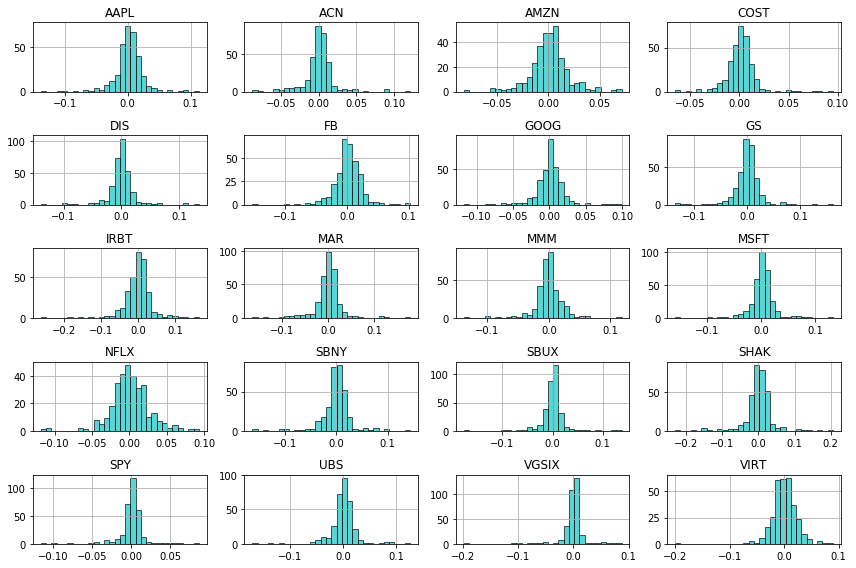

In [109]:
# save down the data
data.to_csv('data.csv',sep=',')

# convert daily stock prices into daily returns
# data might have calendar gaps but the change automatically fills it in with 0
returns = data.pct_change(1)
returns.to_csv('returns.csv',sep=',')

# log returns
log_ret = np.log(data/data.shift(1))

# calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

# set array holding portfolio weights of each stock
#weights = np.asarray([0.5,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
weights = np.ones(20)*0.05

# returns.plot(figsize=(12,8))
#returns['VIRT'].plot(kind='hist', bins=50,figsize=(8,7),color='green')
#returns['AAPL'].plot(kind='hist', bins=50,figsize=(8,7),color='red')

# stacked histogram
# returns.plot(kind='hist',bins=30,figsize=(10,7))
# separate histograms
log_ret.hist(bins=30,figsize=(12,8), color='c', edgecolor='k', alpha=0.65)
plt.tight_layout()

In [110]:
# correlation matrix

def correlation_rounding(a, b):
    r = np.minimum(a, b).sum().round(decimals=2)
    return r

#returns.corr(method=correlation_rounding)
log_ret.corr(method=correlation_rounding)

Symbols,AAPL,ACN,AMZN,COST,DIS,GOOG,GS,FB,IRBT,MAR,MMM,MSFT,NFLX,SBNY,SBUX,SHAK,SPY,UBS,VGSIX,VIRT
Symbols,,,,,,,,,,,,,,,,,,,,
AAPL,1.00,-1.40,-1.53,-1.59,-1.97,-1.29,-1.70,-1.61,-3.44,-2.34,-1.93,-1.03,-2.23,-2.57,-1.69,-3.35,-1.05,-1.90,-1.80,-3.47
ACN,-1.40,1.00,-1.52,-1.25,-1.63,-1.37,-1.66,-1.70,-3.62,-2.32,-1.94,-1.04,-2.36,-2.17,-1.23,-2.99,-0.80,-1.85,-1.25,-3.25
AMZN,-1.53,-1.52,1.00,-1.42,-2.01,-1.24,-2.07,-1.53,-3.55,-2.55,-2.06,-1.11,-1.99,-2.73,-1.95,-3.37,-1.17,-2.06,-1.87,-3.33
COST,-1.59,-1.25,-1.42,1.00,-1.85,-1.54,-1.98,-1.93,-3.74,-2.74,-1.97,-1.27,-2.44,-2.41,-1.61,-3.21,-0.98,-1.96,-1.38,-2.88
DIS,-1.97,-1.63,-2.01,-1.85,1.00,-1.99,-2.00,-2.26,-4.17,-2.77,-2.34,-1.78,-2.85,-2.61,-1.68,-3.31,-1.48,-2.18,-1.98,-3.49
GOOG,-1.29,-1.37,-1.24,-1.54,-1.99,1.00,-1.84,-1.41,-3.65,-2.52,-2.05,-1.00,-2.17,-2.59,-1.65,-3.45,-1.02,-1.98,-1.78,-3.45
GS,-1.70,-1.66,-2.07,-1.98,-2.00,-1.84,1.00,-2.12,-3.65,-2.44,-1.97,-1.65,-2.75,-2.11,-1.85,-3.33,-1.32,-1.58,-1.96,-3.48
FB,-1.61,-1.70,-1.53,-1.93,-2.26,-1.41,-2.12,1.00,-3.67,-2.67,-2.35,-1.32,-2.25,-2.97,-1.96,-3.39,-1.45,-2.30,-2.02,-3.69
IRBT,-3.44,-3.62,-3.55,-3.74,-4.17,-3.65,-3.65,-3.67,1.00,-4.08,-3.94,-3.49,-3.93,-4.03,-3.81,-4.61,-3.37,-3.79,-3.75,-4.83


In [111]:
# covariance matrix
# daily
log_ret.cov()

# daily to annually
(log_ret.cov() * 252).round(decimals=2)

Symbols,AAPL,ACN,AMZN,COST,DIS,GOOG,GS,FB,IRBT,MAR,MMM,MSFT,NFLX,SBNY,SBUX,SHAK,SPY,UBS,VGSIX,VIRT
Symbols,,,,,,,,,,,,,,,,,,,,
AAPL,0.15,0.10,0.08,0.06,0.09,0.10,0.12,0.10,0.10,0.09,0.09,0.12,0.08,0.10,0.10,0.12,0.09,0.11,0.09,-0.00
ACN,0.10,0.11,0.06,0.06,0.09,0.08,0.11,0.08,0.08,0.08,0.07,0.10,0.07,0.10,0.10,0.12,0.08,0.09,0.09,0.01
AMZN,0.08,0.06,0.08,0.04,0.06,0.07,0.07,0.07,0.06,0.04,0.05,0.08,0.07,0.05,0.06,0.07,0.06,0.07,0.05,-0.00
COST,0.06,0.06,0.04,0.06,0.05,0.05,0.06,0.05,0.04,0.02,0.05,0.06,0.04,0.05,0.05,0.06,0.05,0.06,0.05,0.00
DIS,0.09,0.09,0.06,0.05,0.14,0.08,0.11,0.08,0.07,0.08,0.07,0.09,0.05,0.11,0.10,0.12,0.08,0.10,0.08,0.01
GOOG,0.10,0.08,0.07,0.05,0.08,0.11,0.10,0.10,0.08,0.07,0.07,0.10,0.08,0.08,0.09,0.10,0.08,0.09,0.07,-0.00
GS,0.12,0.11,0.07,0.06,0.11,0.10,0.18,0.10,0.12,0.11,0.10,0.12,0.08,0.15,0.12,0.15,0.10,0.14,0.11,0.02
FB,0.10,0.08,0.07,0.05,0.08,0.10,0.10,0.14,0.09,0.08,0.06,0.10,0.08,0.08,0.09,0.12,0.08,0.09,0.08,-0.00
IRBT,0.10,0.08,0.06,0.04,0.07,0.08,0.12,0.09,0.35,0.11,0.07,0.09,0.09,0.12,0.09,0.14,0.08,0.11,0.08,0.02


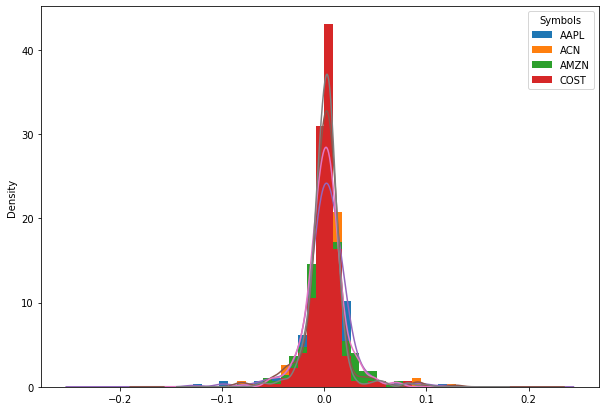

In [112]:
# histogram and kde together
fig, ax = plt.subplots(figsize=(10,7))
returns.iloc[:,0:4].plot.hist(density=True, ax=ax, bins = 30)
returns.iloc[:,0:4].plot.kde(ax=ax, legend=False)

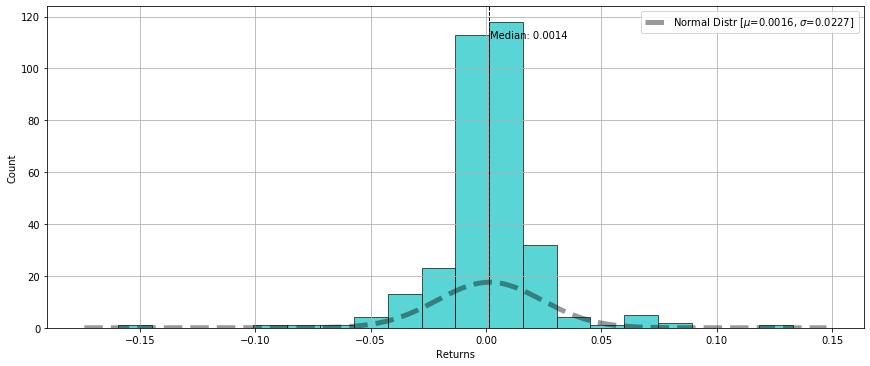

In [113]:
# Single Stock Distribution with Mean - Method 1

# Variable
stock_log_ret = log_ret['MSFT']

# Histogram
fig, ax = plt.subplots(1, 1)
stock_log_ret.hist(bins=20,figsize=(12,5), color='c', edgecolor='k', alpha=0.65)

# Median Line
plt.axvline(stock_log_ret.median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(stock_log_ret.median()*1.1, max_ylim*0.9, 'Median: {:.4f}'.format(stock_log_ret.median()))
min_xlim, max_xlim = plt.xlim()

# Normal distribution
mu = stock_log_ret.mean()
sigma = stock_log_ret.std()
# data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
# rng = np.linspace(-0.3, 0.3, 100000)
rng = np.linspace(min_xlim, max_xlim, 10000)
dist = norm(mu, sigma)
plt.plot(rng, dist.pdf(rng), 'k--', lw=5, alpha=0.4, 
         label='Normal Distr [' + r'$\mu$=' + '{:.4f}'.format(mu) +', ' + r'$\sigma$=' + '{:.4f}'.format(sigma) +']')
plt.tight_layout()

ax.set_xlabel('Returns')
ax.set_ylabel('Count')
plt.legend()


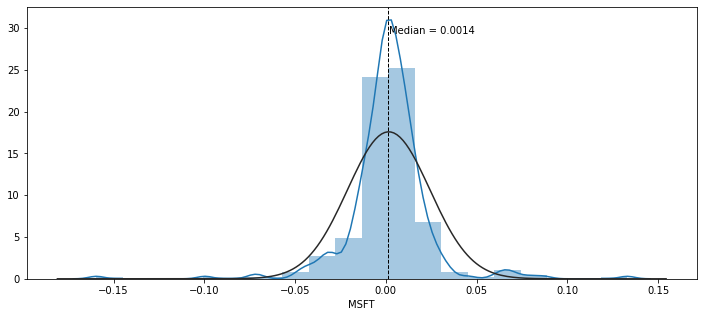

In [114]:
# Single Stock Distribution with Mean - Method 2
# Much easier normal distribution using Seaborns

# Variable
stock_log_ret = log_ret['MSFT']

plt.figure(figsize=(12,5))
sns.distplot(stock_log_ret.dropna(),bins=20,fit=norm) #bins=None is another option

# Median Line
plt.axvline(stock_log_ret.median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(stock_log_ret.median()*1.1, max_ylim*0.9, 'Median = {:.4f}'.format(stock_log_ret.median()))
min_xlim, max_xlim = plt.xlim()

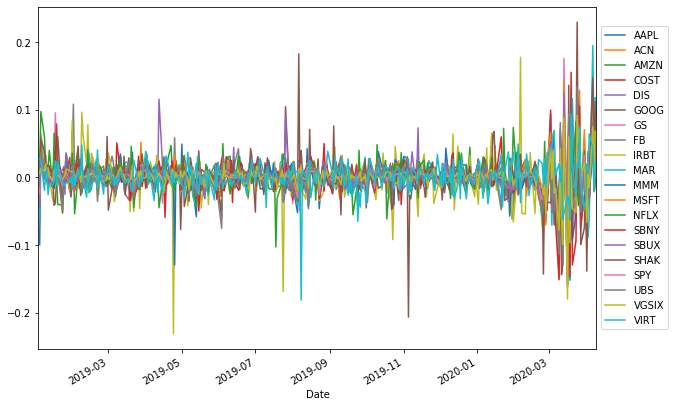

In [115]:
returns.plot(kind='line',figsize=(10,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

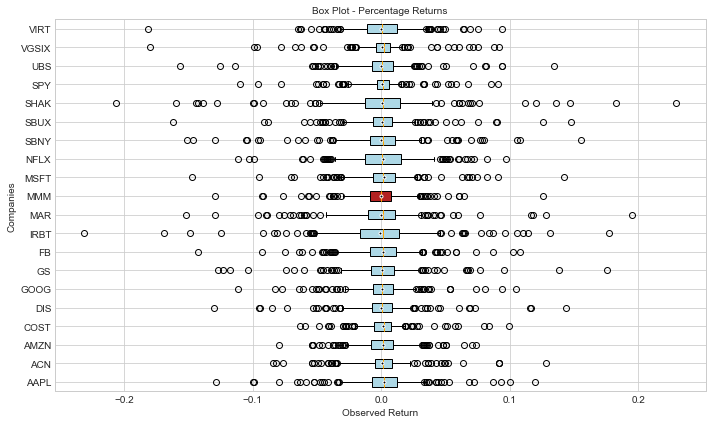

In [116]:
# Box Plots
# color = {'boxes': 'DarkGreen', 'whiskers': 'Blue', 'medians': 'DarkBlue', 'caps': 'Gray'}
# returns.plot(kind='box',vert=False, color=color, figsize=(10,7))
plt.style.use('seaborn-whitegrid') # ggplot  tableau-colorblind10  seaborn-dark-palette  bmh  default

"""
# Method 1 - works - no custom colored plots
bplot1 = returns.plot(kind='box',vert=False, notch=True, figsize=(10,7))  # works

# Method 2 - works - pandas.DataFrame.boxplot - filled plots - no custom color
bplot1 = returns.boxplot(vert=False, notch=True, figsize=(10,7), patch_artist=True) # works
bplot1.set_title('Title')
bplot1.set_xlabel('Observed Returns')
bplot1.set_ylabel('Companies')

# Method 3 - works - no mean() dot
fig, ax = plt.subplots(figsize=(10,6))
bplot1 = ax.boxplot(returns.dropna().values, patch_artist=True, vert=False, labels=returns.columns)
bplot1 = ax.boxplot(returns.dropna().values, patch_artist=True, vert=False, labels=returns.columns, notch=True)
bplot1 = ax.boxplot(returns.dropna().values, patch_artist=False, vert=False, labels=returns.columns)
                    
# Method 4 - works - has mean
fig, ax = plt.subplots(figsize=(10,6))
# mean dots could be o or d
meanpointprops = dict(marker='o', markeredgecolor='white', markersize=3, markerfacecolor='black')
# box plot
bplot1 = ax.boxplot(returns.dropna().values, patch_artist=True, vert=False, 
                    labels=returns.columns, 
                    meanprops=meanpointprops, meanline=False, showmeans=True, whis=[5,95]) # 
# boxplot fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'darkblue','darkgoldenrod','firebrick', 'DarkBlue']
colors = []
for s in list(returns.columns):
    if returns[s].median() > 0:
        colors.append('lightblue')
    else:
        colors.append('firebrick')
# set the colors
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
plt.setp(bplot1['medians'], color='orange')

        
"""

fig, ax = plt.subplots(figsize=(10,6))

# mean dots could be o or d
meanpointprops = dict(marker='o', markeredgecolor='white', markersize=3, markerfacecolor='black')
# box plot
bplot1 = ax.boxplot(returns.dropna().values, patch_artist=True, vert=False, 
                    labels=returns.columns, 
                    meanprops=meanpointprops, meanline=False, showmeans=True, whis=[5,95]) # [5,95] or 1.5 default
# whis = determines the reach of the whiskers to the beyond the first and third quartiles. 
# In other words, IQR is the interquartile range (Q3-Q1), the upper whisker will extend to last datum less than Q3 + whis*IQR). 
# Similarly, the lower whisker will extend to the first datum greater than Q1 - whis*IQR. 
# Beyond the whiskers, data are considered outliers and are plotted as individual points. 
# Alternatively, set this to an ascending sequence of percentile (ex.[5, 95]) to set whiskers at specific percentiles of the data 

# boxplot fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'darkblue','darkgoldenrod','firebrick', 'DarkBlue']
colors = []
for s in list(returns.columns):
    if returns[s].median() > 0:
        colors.append('lightblue')
    else:
        colors.append('firebrick')
# set the colors
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
plt.setp(bplot1['medians'], color='orange')


# clean up script
ax.set_title('Box Plot - Percentage Returns', fontsize=10)
ax.set_xlabel('Observed Return')
ax.set_ylabel('Companies')

plt.tight_layout()
#fig.suptitle("Super Title")
#fig.subplots_adjust(hspace=0.1)
#plt.savefig('boxplot_whis_5_95.png')
plt.show()



In [117]:
list(returns.columns)

['AAPL',
 'ACN',
 'AMZN',
 'COST',
 'DIS',
 'GOOG',
 'GS',
 'FB',
 'IRBT',
 'MAR',
 'MMM',
 'MSFT',
 'NFLX',
 'SBNY',
 'SBUX',
 'SHAK',
 'SPY',
 'UBS',
 'VGSIX',
 'VIRT']

In [118]:
returns.describe()

Symbols,AAPL,ACN,AMZN,COST,DIS,GOOG,GS,FB,IRBT,MAR,MMM,MSFT,NFLX,SBNY,SBUX,SHAK,SPY,UBS,VGSIX,VIRT
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.002002,0.000999,0.001049,0.001358,0.000181,0.000678,0.000649,0.001073,-0.000888,-0.000392,-0.000437,0.001845,0.001340,0.000036,0.000780,0.000752,0.000563,-0.000231,0.000600,0.000219
std,0.024202,0.020679,0.018161,0.016048,0.023477,0.020923,0.026576,0.023365,0.036417,0.029125,0.021435,0.022675,0.025357,0.029000,0.023444,0.038687,0.017512,0.024150,0.020958,0.023467
min,-0.128647,-0.083899,-0.079221,-0.063155,-0.129846,-0.111008,-0.127053,-0.142530,-0.230911,-0.151914,-0.129450,-0.147390,-0.111389,-0.151207,-0.162042,-0.206389,-0.109424,-0.156560,-0.179516,-0.181487
25%,-0.006970,-0.004929,-0.007792,-0.005255,-0.007387,-0.006473,-0.008300,-0.008837,-0.016717,-0.009932,-0.008438,-0.006698,-0.012899,-0.008983,-0.006461,-0.012199,-0.003103,-0.007185,-0.003878,-0.011161
50%,0.002113,0.001605,0.001189,0.002060,0.000457,0.000810,0.000823,0.001200,0.001053,0.001430,0.000000,0.001422,0.000251,0.001563,0.001777,0.001700,0.001083,0.000796,0.001943,0.000402
75%,0.012039,0.008487,0.009158,0.007508,0.008330,0.009425,0.010000,0.011827,0.014123,0.010372,0.007882,0.010443,0.015093,0.010987,0.008629,0.014921,0.006458,0.009066,0.007037,0.012346
max,0.119808,0.128573,0.073791,0.099595,0.144123,0.104485,0.175803,0.108164,0.177357,0.194820,0.125986,0.142169,0.097234,0.155074,0.147303,0.229312,0.090603,0.134177,0.091341,0.093601


Symbols,AAPL,ACN,AMZN,COST
count,320.000000,320.000000,320.000000,320.000000
mean,0.002002,0.000999,0.001049,0.001358
std,0.024202,0.020679,0.018161,0.016048
min,-0.128647,-0.083899,-0.079221,-0.063155
25%,-0.006970,-0.004929,-0.007792,-0.005255
50%,0.002113,0.001605,0.001189,0.002060
75%,0.012039,0.008487,0.009158,0.007508
max,0.119808,0.128573,0.073791,0.099595


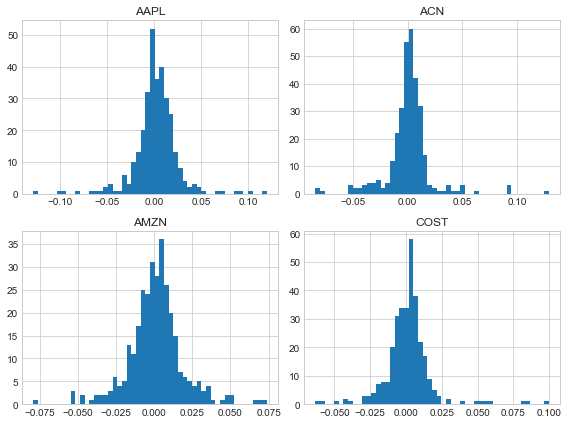

In [119]:
# Choose a subset of columns to plot
returns[['AAPL','ACN']]
returns.iloc[:,0:4].hist(bins=50,figsize=(8,6))
plt.tight_layout()
returns.iloc[:,0:4].describe()

Symbols,IRBT,MAR,MMM,UBS,SBNY,DIS,VIRT,SHAK,GS,VGSIX,SPY,GOOG,SBUX,ACN,FB,AMZN,NFLX,COST,MSFT,AAPL
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.987885,0.946771,0.962346,0.987251,1.011101,0.975773,1.027703,0.983389,0.985351,1.005771,0.976137,0.971516,0.956623,0.965858,0.970961,0.974758,1.013226,0.978804,0.963212,0.900393
2019-01-04,1.051489,1.003257,1.001938,1.023108,1.026029,1.005873,1.052713,1.038833,1.017555,1.018961,1.008834,1.023770,0.988339,1.003414,1.016731,1.023559,1.111746,1.007228,1.008010,0.938830
2019-01-07,1.080010,1.005118,0.999633,1.033466,1.045933,1.014591,1.032705,1.078788,1.023194,1.028442,1.016788,1.021552,0.988339,1.006900,1.017468,1.058721,1.178136,1.010940,1.009296,0.936740
2019-01-08,1.114462,1.021403,1.003823,1.035857,1.066029,1.022483,1.039631,1.100786,1.019415,1.049464,1.026341,1.029096,0.989117,1.032364,1.050486,1.076309,1.196555,1.018510,1.016614,0.954597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,0.479808,0.559901,0.730821,0.743422,0.704151,0.872050,0.932103,0.745006,0.877033,0.921456,1.016775,1.049749,1.003316,1.100114,1.136350,1.238745,1.351565,1.426547,1.547972,1.555336
2020-04-06,0.534452,0.668981,0.768567,0.803972,0.745319,0.924998,0.973002,0.854545,0.944483,0.990554,1.085068,1.134886,1.078744,1.200617,1.220150,1.297870,1.419562,1.507944,1.663091,1.691020
2020-04-07,0.547451,0.699591,0.789870,0.806495,0.768787,0.940417,0.952143,0.872054,0.990982,0.998709,1.086174,1.134494,1.093384,1.186662,1.244325,1.306972,1.390869,1.500580,1.645179,1.671434


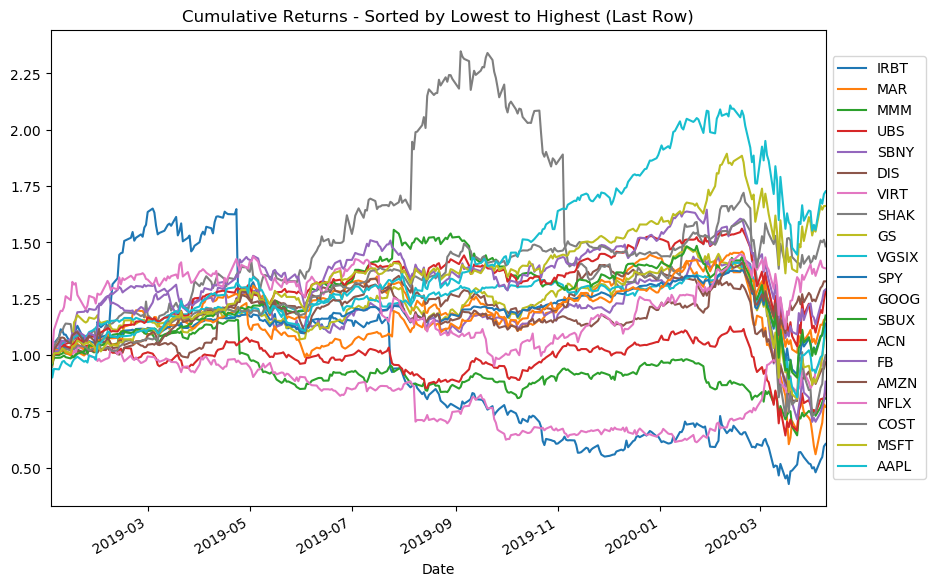

In [120]:
plt.style.use('default') # ggplot  tableau-colorblind10  seaborn-dark-palette  bmh  default
norm_returns = (data.dropna())/(data.dropna().iloc[0])
# sort by last row: new_columns = data2.columns[data2.loc[data2.last_valid_index()].argsort()]
new_columns = norm_returns.columns[norm_returns.iloc[-1].argsort()]
norm_returns = norm_returns[new_columns]
norm_returns.plot(kind='line',figsize=(10,7))
plt.title('Cumulative Returns - Sorted by Lowest to Highest (Last Row)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
norm_returns

In [121]:
# for every stock dataframe, create a new column, take adjusted close column and divide by INITIAL PRICE
# first entry should be 1.0 (or 100%)


#for stock_df in (aapl, cisco, ibm, amzn):
#    stock_df['Normalized Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

norm_returns = (data.dropna())/(data.dropna().iloc[0])


# how to allocate?
# should sum up to 1.0
# sample allocation
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm
# for stock_df, alloc in zip((aapl, cisco, ibm, amzn),[0.3, 0.2, 0.4, 0.1]):
#    stock_df['Allocation'] = stock_df['Normalized Return']*alloc

# equally weighted
# np.ones(20)*0.05 # 0.05 is 100% divided by 20
weights = np.ones(len(norm_returns.columns))*(1/len(norm_returns.columns))
    
allocation_norm_returns = norm_returns * weights
    
# will have 3 columns: Adj Close, Normalized Close, Allocation = Normalized Return * alloc
# first frame would be Normalized Return = 1.0 and Allocation 0.3*1.0 = 0.3
# aapl.head()
allocation_norm_returns.head()

# Allocate some money
# ex) 30% of 1 million dollars = 300k
# for every stock dataframe, create a column called position value
# the position value is Allocation * Portfolio Value
# for stock_df in (aapl, cisco, ibm, amzn):
#    stock_df['Position Values'] = stock_df['Allocation']*1000000

portfolio_size = 1000000
portfolio_val = allocation_norm_returns * portfolio_size
portfolio_val

"""
# Now create super dataframe for total portfolio value 
all_pos_vals = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]
# axis = 1 concat to concat columns -- if you forget then it just creates more rows
portfolio_val = pd.concat(all_pos_vals, axis=1)
portfolio_val.head()
# Add the column headers with positions
portfolio_val.columns = ['AAPL Posn','CISCO Posn','IBM Posn','AMZN Posn']
"""

# Create a Total Position Column (so axis = 1)
portfolio_val['Total_P'] = portfolio_val.sum(axis=1)
portfolio_val.head()

Symbols,AAPL,ACN,AMZN,COST,DIS,GOOG,GS,FB,IRBT,MAR,...,MSFT,NFLX,SBNY,SBUX,SHAK,SPY,UBS,VGSIX,VIRT,Total_P
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,1.000000e+06
2019-01-03,45019.629664,48292.911548,48737.924169,48940.223311,48788.654807,48575.800606,49267.562462,48548.058890,49394.245892,47338.547635,...,48160.599694,50661.288294,50555.025451,47831.154235,49169.474886,48806.862974,49362.549500,50288.536566,51385.146800,9.772415e+05
2019-01-04,46941.483597,50170.716017,51177.938499,50361.403280,50293.654286,51188.506283,50877.751929,50836.528742,52574.458570,50162.853249,...,50400.512694,55587.312869,51301.436802,49416.974660,51941.638128,50441.678834,51155.376524,50948.055150,52635.629096,1.018511e+06
2019-01-07,46837.011612,50344.979078,52936.074425,50546.978354,50729.554012,51077.594282,51159.677968,50873.382409,54000.507407,50255.911732,...,50464.791419,58906.820598,52296.649451,49416.974660,53939.396404,50839.396385,51673.306559,51422.086818,51635.242479,1.029338e+06
2019-01-08,47729.865156,51618.180641,53815.465581,50925.477301,51124.158161,51454.800135,50970.758786,52524.324319,55723.119598,51070.167130,...,50830.694560,59827.763699,53301.437548,49455.843016,55039.283676,51317.050645,51792.827024,52473.203898,51981.532104,1.043167e+06


Text(0.5, 1.0, 'Total Portfolio Value')

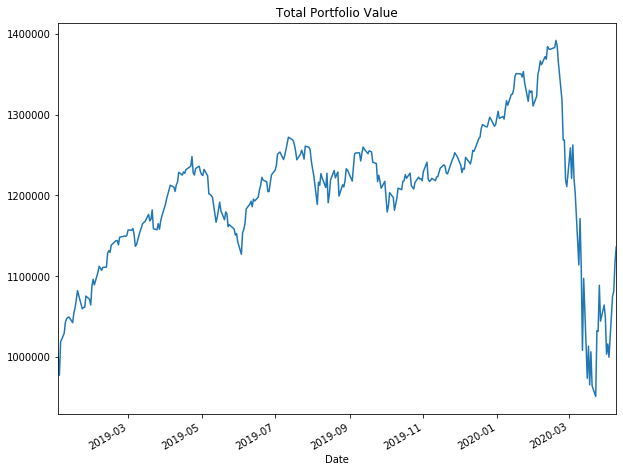

In [122]:
# Plot total portfolio value
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_val['Total_P'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')



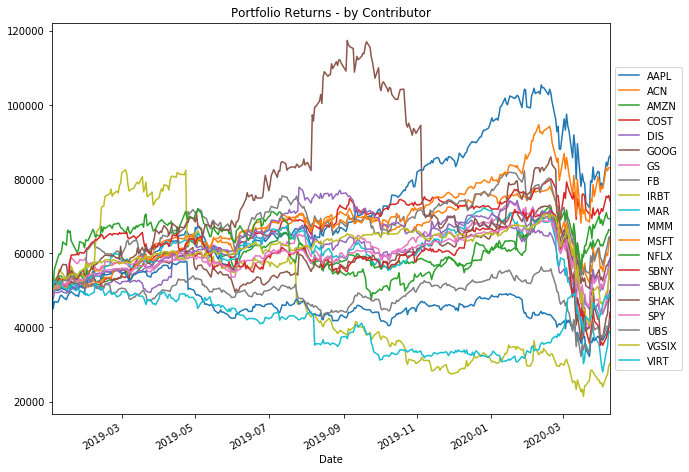

In [123]:
# See each contributor in a plot
# Drop the total so it looks better (remember it is a column so it is axis=1)
portfolio_val.drop('Total_P', axis=1).plot(figsize=(10,8))
plt.title('Portfolio Returns - by Contributor')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
plt.show()

In [124]:
# Portfolio Statistics
portfolio_val['Daily Return'] = portfolio_val['Total_P'].pct_change(1)
print('Mean = ' + str(portfolio_val['Daily Return'].mean()))
print('Std Dev = ' + str(portfolio_val['Daily Return'].std()))
portfolio_val.head()

Mean = 0.0005584377051111453
Std Dev = 0.017801711552670768


Symbols,AAPL,ACN,AMZN,COST,DIS,GOOG,GS,FB,IRBT,MAR,...,NFLX,SBNY,SBUX,SHAK,SPY,UBS,VGSIX,VIRT,Total_P,Daily Return
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,1.000000e+06,NaN
2019-01-03,45019.629664,48292.911548,48737.924169,48940.223311,48788.654807,48575.800606,49267.562462,48548.058890,49394.245892,47338.547635,...,50661.288294,50555.025451,47831.154235,49169.474886,48806.862974,49362.549500,50288.536566,51385.146800,9.772415e+05,-0.022758
2019-01-04,46941.483597,50170.716017,51177.938499,50361.403280,50293.654286,51188.506283,50877.751929,50836.528742,52574.458570,50162.853249,...,55587.312869,51301.436802,49416.974660,51941.638128,50441.678834,51155.376524,50948.055150,52635.629096,1.018511e+06,0.042230
2019-01-07,46837.011612,50344.979078,52936.074425,50546.978354,50729.554012,51077.594282,51159.677968,50873.382409,54000.507407,50255.911732,...,58906.820598,52296.649451,49416.974660,53939.396404,50839.396385,51673.306559,51422.086818,51635.242479,1.029338e+06,0.010630
2019-01-08,47729.865156,51618.180641,53815.465581,50925.477301,51124.158161,51454.800135,50970.758786,52524.324319,55723.119598,51070.167130,...,59827.763699,53301.437548,49455.843016,55039.283676,51317.050645,51792.827024,52473.203898,51981.532104,1.043167e+06,0.013435


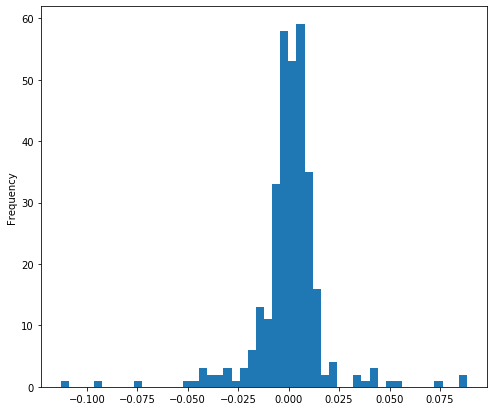

In [125]:
# Plot it in a histogram
portfolio_val['Daily Return'].plot(kind='hist', bins=50,figsize=(8,7))

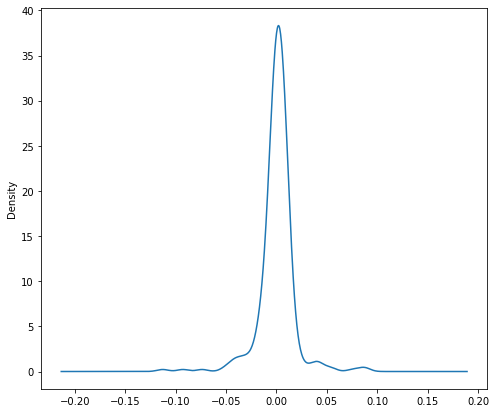

In [126]:
# Plot it in a kde
portfolio_val['Daily Return'].plot(kind='kde', figsize=(8,7))

In [127]:
# Overall Cumulative Return (not daily cumulative return)
cumulative_return = (portfolio_val['Total_P'][-1]/portfolio_val['Total_P'][0] - 1)
cumulative_return

0.136173291896305

In [128]:
# current portfolio value
portfolio_val['Total_P'][-1]

1136173.291896305

In [129]:
# calculate sharpe ratio
RiskFreeRate = 0.01/252
SR = (portfolio_val['Daily Return'].mean() - RiskFreeRate) / portfolio_val['Daily Return'].std()
SR

0.029140746601456834

In [130]:
# Annualized Sharpe Ratio
# annualize the SR from the daily rate
# Square root of 252 days * Sharpe Ratio
ASR = (252**0.5) * SR
ASR
# a good sharpe ratio > 1 is considered good depending on client
# a ratio > 2 is great and a ratio > 3 is excellent
# level of risk taking corresponding to additional return

0.4625950111572326

In [131]:
# Portfolio Optimization
# Guess and check a bunch of random allocation sto get the best sharpe ratio
# Monte Carlo Simulation
# We will use scipy to optimize: minimize the negative sharpe ratio (minimizer tool)

# arithmetic return
print(data.pct_change(1).mean())

# log returns
log_ret = np.log(data/data.shift(1))
log_ret.head()

log_ret.mean()

# compare the pairwise covariance
# check the wikipedia article to see what they represent

# daily
log_ret.cov()

# daily to annually
log_ret.cov() * 252

Symbols
AAPL     0.002002
ACN      0.000999
AMZN     0.001049
COST     0.001358
DIS      0.000181
GOOG     0.000678
GS       0.000649
FB       0.001073
IRBT    -0.000888
MAR     -0.000392
MMM     -0.000437
MSFT     0.001845
NFLX     0.001340
SBNY     0.000036
SBUX     0.000780
SHAK     0.000752
SPY      0.000563
UBS     -0.000231
VGSIX    0.000600
VIRT     0.000219
dtype: float64


Symbols,AAPL,ACN,AMZN,COST,DIS,GOOG,GS,FB,IRBT,MAR,MMM,MSFT,NFLX,SBNY,SBUX,SHAK,SPY,UBS,VGSIX,VIRT
Symbols,,,,,,,,,,,,,,,,,,,,
AAPL,0.148850,0.096328,0.075168,0.062596,0.092758,0.100629,0.122290,0.104321,0.099514,0.090488,0.086957,0.116238,0.083688,0.099708,0.104247,0.115375,0.094523,0.111108,0.090295,-0.004597
ACN,0.096328,0.106314,0.059662,0.055099,0.088124,0.080579,0.106994,0.083333,0.078157,0.075413,0.070692,0.096704,0.067012,0.104611,0.099514,0.121901,0.080840,0.093906,0.086545,0.005642
AMZN,0.075168,0.059662,0.082967,0.043831,0.055786,0.068197,0.069023,0.073050,0.064691,0.044384,0.048267,0.078284,0.074463,0.054647,0.057767,0.073712,0.056911,0.067921,0.047821,-0.002472
COST,0.062596,0.055099,0.043831,0.063604,0.046606,0.050244,0.059927,0.049912,0.039328,0.022829,0.045712,0.063591,0.044603,0.053522,0.052815,0.061624,0.050447,0.055199,0.050704,0.002070
DIS,0.092758,0.088124,0.055786,0.046606,0.138375,0.079115,0.114916,0.081700,0.074251,0.081758,0.072326,0.091051,0.054250,0.107597,0.104142,0.124862,0.079353,0.098743,0.080330,0.006239
GOOG,0.100629,0.080579,0.068197,0.050244,0.079115,0.110870,0.099688,0.095620,0.084285,0.071105,0.065262,0.098438,0.078853,0.081276,0.091677,0.101636,0.076890,0.090488,0.073237,-0.002875
GS,0.122290,0.106994,0.069023,0.059927,0.114916,0.099688,0.177570,0.100175,0.123000,0.110373,0.095323,0.116543,0.078118,0.150607,0.120455,0.151196,0.103489,0.136778,0.107775,0.017912
FB,0.104321,0.083333,0.073050,0.049912,0.081700,0.095620,0.100175,0.139158,0.086595,0.083260,0.063384,0.102536,0.084914,0.080162,0.094032,0.116219,0.079788,0.092556,0.080953,-0.004237
IRBT,0.099514,0.078157,0.064691,0.039328,0.074251,0.084285,0.123000,0.086595,0.347974,0.108737,0.072394,0.090844,0.091325,0.115187,0.089991,0.140534,0.079869,0.107163,0.079737,0.015410


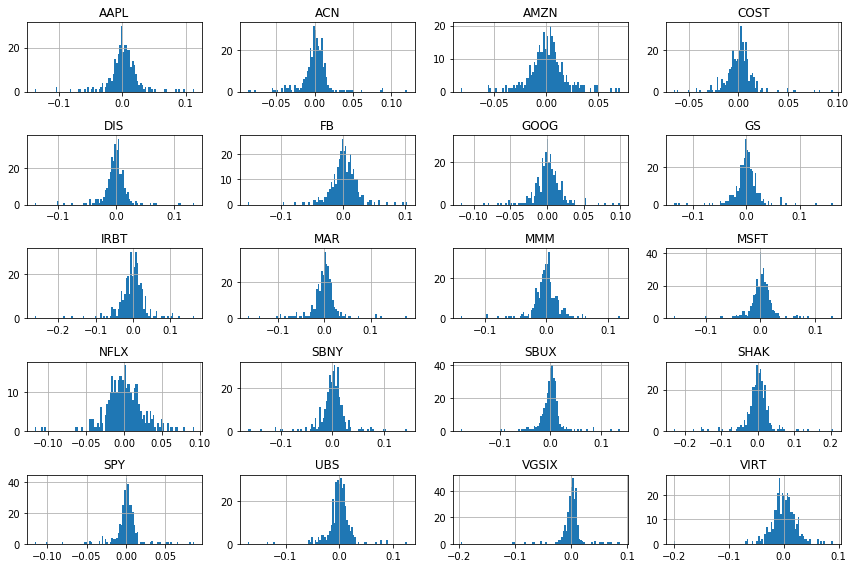

In [132]:
# log return histogram
log_ret.hist(bins = 100, figsize=(12,8))
plt.tight_layout()

In [133]:
# Basic Sharpe Ratio Calculation

# to get same random number each time
np.random.seed(101)

# remind us which stocks are there
print(log_ret.columns)

# Weights - Generate 4 random weights
weights = np.array(np.random.random(len(log_ret.columns)))
print("Random Weights")
print(weights)
# Weights - Normalization technique to sum to 1
print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# Expected Portfolio Return, adjust for risk free rate
print('Risk Free Rate')
rf_rate = 0.0   # Annualized risk free rate
print(rf_rate)

# Expected Portfolio Return = take log returns, then average it, then, x weights x 252 trading days, then sum it up
print('Expected Portfolio Return')
exp_ret = np.sum( (log_ret.mean() * weights) * 252)  - rf_rate
print(exp_ret)


# Expected volatility (denominator of sharpe ratio) = Calculate Variance/StdDev
# First take covariance of the log returns, annualize by multiply by 252
# Then dot product the covariance with the weights
# Then dot product again with the weights transpose
# Then square root the whole thing
# Use numpy dot products to run faster (can re-write to run slower so use linear algebra speed complex code)
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
# The greater the Sharpe ratio, the more attractive the risk-adjusted return is, used to compare investment strategies
# Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return
# 1) Assumption that returns are normally distributed, but in real market scenarios, 
# the distribution might suffer from kurtosis and fatter tails, which decreases the relevance of its use
# 2) Drawback of Sharpe ratio is that it cannot distinguish between upside and downside and focuses on volatility 
# but not its direction
# 3) Sharpe ratio is backward-looking and accounts for historical returns & volatility, can be manipulated on lookback window
# 4) In future, look at Sortino ratio for downside only
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['AAPL', 'ACN', 'AMZN', 'COST', 'DIS', 'GOOG', 'GS', 'FB', 'IRBT', 'MAR',
       'MMM', 'MSFT', 'NFLX', 'SBNY', 'SBUX', 'SHAK', 'SPY', 'UBS', 'VGSIX',
       'VIRT'],
      dtype='object', name='Symbols')
Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308 0.72154386 0.18993895 0.55422759 0.35213195
 0.1818924  0.78560176 0.96548322 0.23235366 0.08356143 0.60354842
 0.72899276 0.27623883]
Rebalance
[0.05333413 0.05893908 0.00294084 0.01771492 0.07077604 0.08612564
 0.03170375 0.09229318 0.07452172 0.01961707 0.05724114 0.03636851
 0.01878602 0.08113768 0.099716   0.0239977  0.0086303  0.06233504
 0.07529105 0.0285302 ]
Risk Free Rate
0.0
Expected Portfolio Return
0.05029103964970683
Expected Volatility
0.3027655466853536
Sharpe Ratio
0.16610555659416343


In [146]:
# For Loop Sharpe Ratio (No Print Statements)
# Basic Sharpe Ratio Calculation

# to get same random number each time
# np.random.seed(101)

# Number of portfolios
num_ports = 5000

# Save results through each iteration
# Create a 2D array of weights (rows=num_ports, columns=number_stocks)
all_weights = np.zeros((num_ports,len(log_ret.columns))) 
# array to hold all the returns, vols, SRs
ret_arr = np.zeros(num_ports)                            
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

# For loop
for ind in range(num_ports):

    # Weights
    weights = np.array(np.random.random(  len(log_ret.columns)  ))
    # Normalization technique to sum to 1
    weights = weights/np.sum(weights)
    # For Loop - Save weights 
    all_weights[ind,:] = weights

    # Expected Portfolio Return, adjust for risk free rate
    rf_rate = 0.0   # Annualized risk free rate

    # Expected Portfolio Return = take log returns, then average it, then, x weights x 252 trading days, then sum it up
    # exp_ret = np.sum( (log_ret.mean() * weights) * 252)  - rf_rate
    # for loop saving:
    ret_arr[ind] = np.sum( (log_ret.mean() * weights) * 252)  - rf_rate

    # Expected volatility (denominator of sharpe ratio) = Calculate Variance/StdDev
    # First take covariance of the log returns, annualize by multiply by 252
    # Then dot product the covariance with the weights
    # Then dot product again with the weights transpose
    # Then square root the whole thing
    # Use numpy dot products to run faster (can re-write to run slower so use linear algebra speed complex code)
    # exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))

    # Sharpe Ratio
    # The greater the Sharpe ratio, the more attractive the risk-adjusted return is, used to compare investment strategies
    # Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return
    # 1) Assumption that returns are normally distributed, but in real market scenarios, 
    # the distribution might suffer from kurtosis and fatter tails, which decreases the relevance of its use
    # 2) Drawback of Sharpe ratio is that it cannot distinguish between upside and downside and focuses on volatility 
    # but not its direction
    # 3) Sharpe ratio is backward-looking and accounts for historical returns & volatility, can be manipulated on lookback window
    # 4) In future, look at Sortino ratio for downside only
    # SR = exp_ret/exp_vol
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
    

In [147]:
# Highest sharpe ratio is 
print('Highest Sharpe Ratio:')
print(sharpe_arr.max())

# Location of highest sharpe ratio
print('Row Location of Highest Sharpe Ratio:')
print(sharpe_arr.argmax()) # for example portfolio it is row 1420

# So the weight would be
max_sr_location = sharpe_arr.argmax()  # 1420

# all_weights[1420,:]
print('Weights of Max Row:')
print(all_weights[max_sr_location,:])
all_weights[max_sr_location,:]
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]



Highest Sharpe Ratio:
0.6282592933338069
Row Location of Highest Sharpe Ratio:
3214
Weights of Max Row:
[0.08493182 0.04365586 0.09965364 0.08224379 0.04550782 0.08447832
 0.01805154 0.08019752 0.00492843 0.04539292 0.01645009 0.08795005
 0.03728061 0.00074486 0.03864002 0.00508535 0.09247738 0.00917509
 0.05424786 0.06890704]


Text(0, 0.5, 'Return')

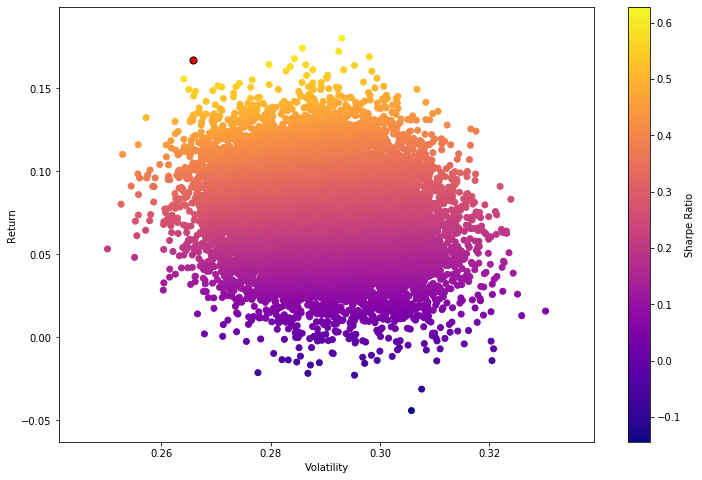

In [148]:
# Scatter plot out the 
fig, ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter(vol_arr, ret_arr,c=sharpe_arr,cmap='plasma')  # cmap='plasma'
# color bar for a fig subplot 
fig.colorbar(scatter, label="Sharpe Ratio")


# Scatter plot the max point, red dot
ax.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

ax.set_xlabel('Volatility')
ax.set_ylabel('Return')

In [137]:
# Optimization Function
# Previously random
# Use scipy to help

# log returns
log_ret = np.log(data/data.shift(1))

# function that returns [Return, Volatility, Sharpe Ratio]
# input is weight matrix
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights))) # do all calcs before sqrt
    sr = ret/vol
    return np.array([ret,vol,sr])


In [138]:
# Constraints for Minimizer
# Constraints mean less things to check

# This function is a helper function for scipy minimizer (to calculate the negative sharpe ratio)
def neg_sharpe(weights):
    # get_ret_vol_sr(weights) = np.array([pret,vol,sr])
    return get_ret_vol_sr(weights)[2]*-1


# This function is a constraint function to check the sum of the weights = 1
# return 0 if sum of the weights is 1
def check_sum(weights):
    return np.sum(weights) - 1

# Other Constraints
constraint = ({'type':'eq','fun':check_sum})   # tuple with dictionary inside: check_sum returns 0 if meets reqt
bounds = ((0,1),(0,1),(0,1),(0,1))             # tuple of tuples repeated 4 times: the bounds of each weight to be 0 to 1
bounds = list(zip(np.zeros(10),np.ones(10)))
bounds = list(zip(np.zeros( len(log_ret.columns) ) , np.ones( len(log_ret.columns) )))
# equally weighted
# np.ones(20)*0.05 # 0.05 is 100% divided by 20
initial_guess = [0.25,0.25,0.25,0.25]          # list: initial weights
initial_guess = np.ones(len(log_ret.columns))*(1/len(log_ret.columns))

# Minimizer Function
# minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, 
#          bounds=None, constraints=(), tol=None, callback=None, options=None)
# fun (function to minimize) = neg_sharpe
# x0 = initial_guess
# method = different types of solver algos = 'SLSQP' recommended for basic tasks = Sequential Least SQuares Programming
optimize_results = minimize(neg_sharpe,initial_guess, method = 'SLSQP',bounds=bounds,constraints=constraint)
optimize_results



     fun: -1.3024014376510418
     jac: array([-8.37147236e-05,  5.13896570e-01,  1.59419805e-01,  2.56896019e-05,
        1.21743098e+00,  7.85697088e-01,  1.18318646e+00,  4.82671574e-01,
        2.55248423e+00,  1.57073998e+00,  1.69917737e+00,  3.71336937e-05,
        9.72570330e-02,  1.62323613e+00,  8.01734999e-01,  1.45790242e+00,
        7.99463153e-01,  1.84219712e+00,  8.17542702e-01,  6.04970604e-02])
 message: 'Optimization terminated successfully.'
    nfev: 155
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.43121980e-01, 0.00000000e+00, 5.27095728e-15, 6.77035335e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.98426844e-02,
       1.91556840e-15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.16476143e-14])

In [139]:
# Get Optimal Results

# access the "optimize function" results: success or failure?
print('Success: ' + str(optimize_results.success))
# actual values if successful (these are weights)
print('Weights: ' + str(optimize_results.x))

# put weights into function to get Exp Return, Exp Volatility, Sharpe Ratio
print('Results (Exp Return, Exp Volatility, SR): ' + str(get_ret_vol_sr(optimize_results.x)))

# Sharpe Ratio within the Result Set
# seems like maximium sharpe ratio is 1.03 similar to the above which used 5000 random MC guesses (for more securities, optimization is better than MC)
print('Sharpe Ratio: ', get_ret_vol_sr(optimize_results.x)[2])
get_ret_vol_sr(optimize_results.x)[2]



Success: True
Weights: [2.43121980e-01 0.00000000e+00 5.27095728e-15 6.77035335e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.98426844e-02
 1.91556840e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.16476143e-14]
Results (Exp Return, Exp Volatility, SR): [0.34648952 0.26603896 1.30240144]
Sharpe Ratio:  1.3024014376510418


1.3024014376510418

In [154]:
# Calculate efficient frontier
# 1) "get highest return for each level of risk" 
# 2) OR "lowest risk possible for given level of return"
# 3) best y value for each x value


# y values storage, 100 points on the 
# look up at the visualization to see which x min and x max (vol min and vol max)
# vol min looks like 0 and vol max looks like 0.3

# NEED TO UPDATE THESE POSSIBLE Y VALUES 
frontier_y = np.linspace(-0.05, 0.4, 50)
# tried 0.46, 0.65, 100
# tried 0, 1, 100
# tried -1, -0.3

# function to return volatility
# give weights
# return the volatility [1]
# comment = we do not need to inverse the volatility, unlike the sharpe ratio 
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]


frontier_volatility = []

# Calc Start Time
now = datetime.datetime.now()
print("run started: =", now)

# for every possible return on the y axis, what possible x
# eq means equation
# first constraint: all sums have to equal 1 (returns 0)
# second constraint: get the returns and subtract the possible return (that's the max possible return, returns 0)
for possible_return in frontier_y:
    constraint = ({'type':'eq','fun':check_sum},
                  {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility, initial_guess, method='SLSQP',bounds=bounds, constraints=constraint)
    # fun is function value from result
    frontier_volatility.append(result['fun'])

# Calc End Time
# takes 25 seconds to run (5 minutes for 20 assets?)
print("run ended: =", datetime.datetime.now())
print("run duration: =", datetime.datetime.now()-now)


run started: = 2020-04-12 15:42:32.295015
run ended: = 2020-04-12 15:44:21.418541
run duration: = 0:01:49.123526


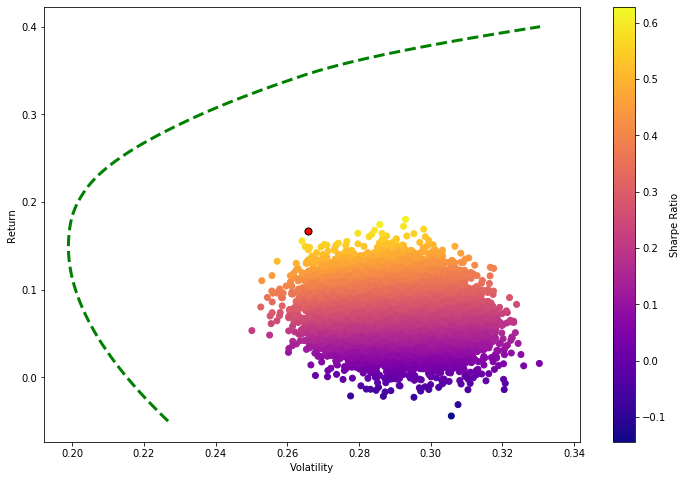

In [149]:
# Scatter plot out the results from before
fig, ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter(vol_arr, ret_arr,c=sharpe_arr,cmap='plasma')  # cmap='plasma'
# color bar for a fig subplot 
fig.colorbar(scatter, label="Sharpe Ratio")


# Scatter plot the max point, red dot
ax.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

ax.set_xlabel('Volatility')
ax.set_ylabel('Return')

# Frontier Volatility - Markovitz Portfolio Allocation
# for each desired volatility, what is the maximum return?
# based on historical return, this is what i allocate
ax.plot(frontier_volatility, frontier_y,'g--',linewidth=3)



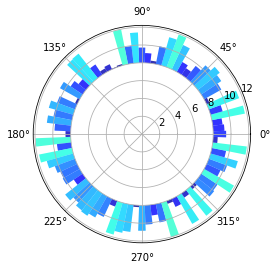

In [150]:
# Here is a plot potentially can use for circular bar chart (Westworld theme)
import numpy as np
import matplotlib.pyplot as plt

N = 80
bottom = 8
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.show()

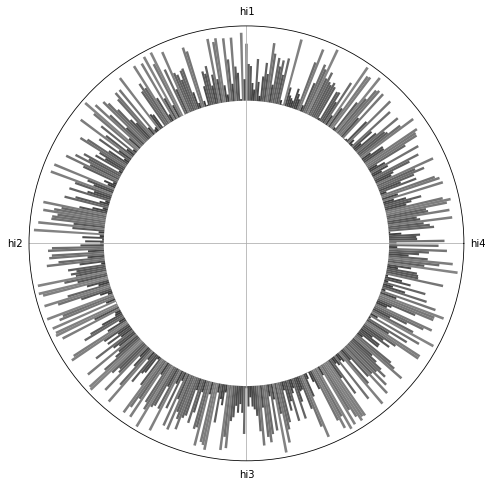

In [155]:
# Here is a plot potentially can use for circular bar chart (Westworld theme)
import numpy as np
import matplotlib.pyplot as plt

N = 500
bottom = 8
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

fig, ax = plt.subplots(figsize=(12,8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
# cmaps['Miscellaneous'] = ['jet', 'gray', 'GnBu', gist_gray', flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern','gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg','gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.gist_gray(r / 10.))
    bar.set_alpha(0.8)

# set tick locations
# ax.set_xticks(theta)
ax.set_xticks([0.5 * np.pi, np.pi, 1.5*np.pi, 2 * np.pi])

# set tick labels
# ax.set_xticklabels(radii)
ax.set_xticklabels(['hi1','hi2','hi3','hi4'])

# turn off y ticks
ax.set_yticks([], [])

plt.show()



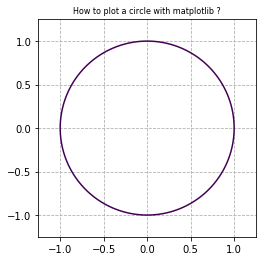

In [156]:
# Here is a basic matplotlib circle
# Potentially use in conjunction with above
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)

X, Y = np.meshgrid(x,y)

F = X**2 + Y**2 - 1.0

fig, ax = plt.subplots()

ax.contour(X,Y,F,[0])

ax.set_aspect(1)

plt.title('How to plot a circle with matplotlib ?', fontsize=8)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')

plt.savefig("plot_circle_matplotlib_03.png", bbox_inches='tight')

plt.show()